In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Nous pouvons visualiser l’arbre crée en utilisant l’outil graphviz (commande dot). <br/>D’abord on génère un fichier .dot

In [2]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

Ensuite, en ligne de commande on génère la sortie pdf (commande shell) :
<br/>
dot -Tpdf iris.dot -o iris.pdf

In [14]:
df = pd.read_csv("titanic-passengers.csv",sep=";")
x= df[["Pclass","Fare"]]
y = df["Survived"]
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y,
    test_size=0.30, random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6343283582089553


In [16]:
!pip install pydotplus
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
            feature_names=["Pclass","Fare"],

            filled=True, rounded=True,
            special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("titanicDecisionTree.pdf")

True

In [4]:
clf.predict(iris.data[:1, :])

array([0])

In [ ]:
iris.data

In [5]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

Le paramètre <span style="color:blue">max_depth</span> est un seuil sur la profondeur maximale de l’arbre. Le paramètre <span style="color:blue">min_samples_leaf donne</span> le nombre minimal d’échantillons dans un nœud feuille. Ils permettent de mettre des contraintes sur la construction de l’arbre et donc de contrôler indirectement le phénomène de sur-apprentissage.

Question :

Faites une partition aléatoire de base de données en apprentissage/test (70% apprentissage, 30% test) et calculez le taux d’éléments mal classifiés sur l’ensemble de test. Faites varier les valeurs des paramètres max_depth et min_samples_leaf pour voir leur impact sur ce score.



Correction :

En général on utilise une division apprentissage/test de type 80/20 ou 70/30 mais comme ici le problème d’apprentissage est particulièrement simple nous prenons seulement 5% de la base comme échantillon d’apprentissage (sinon, on risque de ne rien voir quand on modifie les paramètres).

In [6]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
            test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))


0.6223776223776224
0.8881118881118881
0.7972027972027972
0.7062937062937062
0.8881118881118881
0.7062937062937062
0.7552447552447552


In [7]:
for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.8881118881118881
0.7552447552447552
0.6573426573426573
0.32167832167832167
0.32167832167832167
0.32167832167832167


In [ ]:
##Pour chercher de bonnes valeurs pour les paramètres on peut utiliser la validation croisée avec GridSearchCV :

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)
grid_search.best_estimator_

Affichage de la surface de décision

Pour une paire d’attributs nous pouvons visualiser la surface de décision en 2 dimensions. D’abord on discrétise le domaine bidimensionnel avec un pas constant et ensuite on évalue le modèle sur chaque point de la grille.

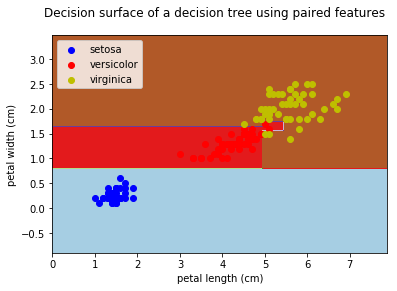

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Charger les données
iris = load_iris()

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# Garder seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.savefig('fig.png')
plt.show()

Question :

Refaire l’affichage pour les autres paires d’attributs. Sur quelle paire la séparation entre les classes est la plus marquée ?

<h1>Arbres de décision pour la régression</h1> a suivre.......
 <p>la classe DecisionTreeRegressor de Scikit-learn</p>